# SNOW Partitioning Parallel
The filter is used to perform SNOW algorithm in parallel and serial mode to save computational time and memory requirement respectively. [SNOW](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.96.023307) algorithm converts a binary image in to partitioned regions while avoiding oversegmentation. SNOW_partitioning_parallel speeds up this process by decomposing the domain into several subdomains and either process them in different cores in parallel to save time or one by one in single core to save memory requirements.     

#### Import Modules

In [1]:
import warnings
import numpy as np
import porespy as ps
from porespy.tools import randomize_colors
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
np.random.seed(10)
warnings.filterwarnings("ignore")
ps.visualization.set_mpl_style()

#### Create a random image of overlapping spheres

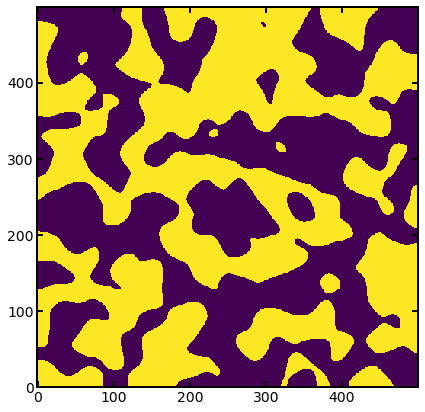

In [2]:
np.random.seed(1)
im = ps.generators.blobs(shape=[500, 500])
plt.figure(figsize=[7, 7])
plt.imshow(im, origin='lower')
plt.show()

#### Apply SNOW_partitioning_parallel on the binary image 

In [3]:
snow_out = ps.filters.snow_partitioning_parallel(im,
                                                 overlap='dt',
                                                 divs=2,
                                                 num_workers=None,
                                                 mode='parallel',
                                                 zoom_factor=0.5,
                                                 r_max=5,
                                                 sigma=0.4,
                                                 return_all=True)

2021-04-08 10:44:07 | WARNING  | porespy.tools.__funcs__:_check_for_singleton_axes:1421
--> Input image conains a singleton axis. Reduce dimensionality with np.squeeze(im) to avoid unexpected behavior.


#### Plot output results 

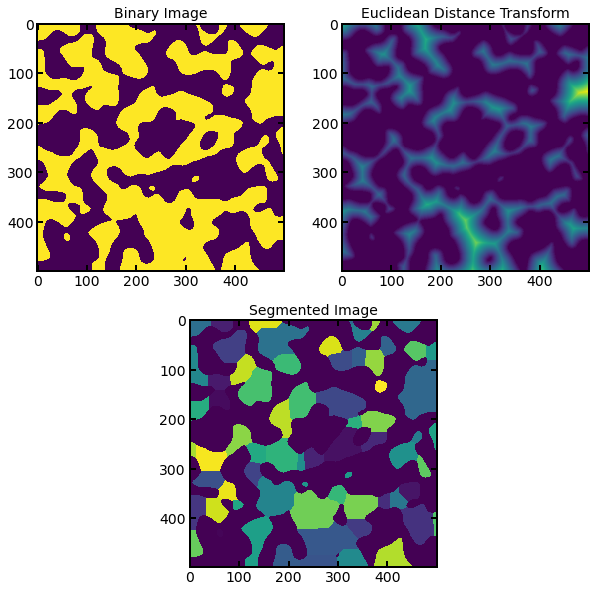

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, 1:3])
ax1.imshow(snow_out.im)
ax2.imshow(snow_out.dt)
ax3.imshow(randomize_colors(snow_out.regions))
ax1.set_title('Binary Image')
ax2.set_title('Euclidean Distance Transform')
ax3.set_title('Segmented Image')
plt.show()

In [5]:
print(f"Number of regions: {np.unique(snow_out.regions).size}")

Number of regions: 70
